# Exploratory Data Analysis

## Notebook Summary
In this notebook, I summarize where the data came from and some of its methodologies, and I look through some key columns in the dataset. I also explore important statistics for the project as a whole moving forward, and specifically examine distributions of various columns and how they relate to the target column.
 Specifically I explore the :
 - Distribution of kids Diagnosed with ADHD
 - Distribution of gender/sex among children diagnosed with ADHD
 - Distribution of race/ethnicity of children diagnosed with ADHD
 - Age/age groups of kids diagnosed with ADHD
 - Correlations of the target column to other columns in the dataset

I then summarize the important findings in the [conclusion](#Conclusion).

## Data Source and Methodologies
The NSCH is a household survey that produces national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States. Since 2016, the NSCH has been an annual survey. The survey supports national estimates every year and state-level estimates by combining 2 or 3 years of data. In this project I am looking at the 2020 data.

The survey collects information related to the health and well-being of children, including access to and use of health care, family interactions, parental health, school and after-school experiences, and neighborhood characteristics. A parent or other adult caregiver with knowledge of the sampled child’s health and health care filled out the topical questionnaire.

Survey topics include:
- Child and family characteristics
- **Physical and mental health status, including current conditions and functional difficulties**
- Health insurance status, type, and adequacy
- Access and use of health care services
- Medical, dental, and specialty care needed and received
- Family health and activities
- Impact of child’s health on family
- Neighborhood characteristics

Please see [this document](https://www2.census.gov/programs-surveys/nsch/technical-documentation/methodology/2020-NSCH-Methodology-Report.pdf) for a full report on the methodologies used by the US Census Bureau when obtaining this data.

## Loading and Exploring the Data
Lets first load and explore the data, and confirm its size and shape.

In [22]:
# Import statements
import warnings

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set_style('white')

In [25]:
# Loading data into pandas dateframe
nsch20 = pd.read_sas('../Data/nsch_2020_topical_SAS/nsch_2020_topical.sas7bdat')

# Joining all the data into one frame, keeping ONLY the columns that are present in all frames.
nsch19 = pd.read_sas('../Data/nsch_2019_topical_SAS/nsch_2019_topical.sas7bdat')
nsch18 = pd.read_sas('../Data/nsch_2018_topical_SAS/nsch_2018_topical.sas7bdat')
nsch = pd.concat([nsch20, nsch19, nsch18], join='inner', ignore_index=True)

### Shape

In [26]:
# Getting shape of data frame and assigning to variables
total_rows, total_columns = nsch.shape

print(f'There are {total_rows} completed surveys')
print(f'There are {total_columns} questions in the survey')

There are 102740 completed surveys
There are 428 questions in the survey


Lets get quick overview of the data before moving on

### Data Types

In [27]:
# Data Types in set
nsch.dtypes.value_counts()

float64    424
object       4
dtype: int64

Though most of these are floats, it is important to remember that this entire dataset is categorical data due to it being a survey.

### NaN values

In [28]:
# Checking for NaN values
nsch.isna().sum().head(10)

FIPSST                 0
STRATUM                0
HHID                   0
FORMTYPE               0
TOTKIDS_R              0
TENURE                 0
HHLANGUAGE           444
SC_AGE_YEARS           0
SC_SEX                 0
K2Q35A_1_YEARS    100006
dtype: int64

In [29]:
# Printing the total amount of NAN values in the data frame
print(f'There are a total of {nsch.isna().sum().sum()} missing values in this data set.')

There are a total of 17558145 missing values in this data set.


It is clear that there are a significant amount of missing values in this set, all of which will have to be dealt with for the modeling process. This can be dealt with when we begin data cleaning. For now, lets move onto visualizing our target and the relationships it has with other questions in the survey.


# ADHD

Our target column for prediction will be "K2Q31A", which says:


> "Has a doctor or other health care provider EVER told you that this child has Attention Deficit Disorder or Attention-Deficit/Hyperactivity Disorder, that is, ADD or ADHD?"

Lets visualize its distribution.

90% of kids in this sample have not been diagnosed ADHD.
10% of kids in this sample have been diagnosed ADHD.


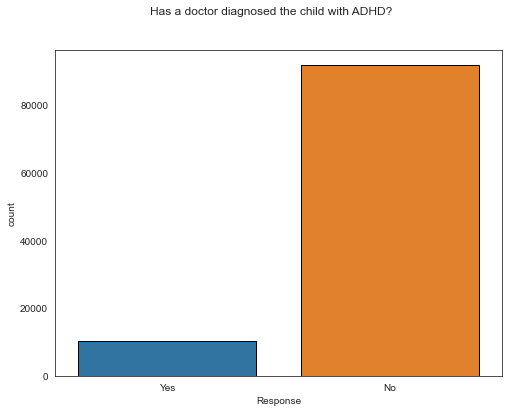

In [30]:
# Replacing numbers with words for easier plotting
adhd_yn = nsch['K2Q31A'].replace({1: 'Yes', 2: 'No'})

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
adhd_figure = sns.countplot(adhd_yn, ax=ax, edgecolor='black', order=['Yes', 'No'])
plt.suptitle('Has a doctor diagnosed the child with ADHD?')
adhd_figure.set(xlabel='Response')


# Percentages of kids with ADHD
no_adhd_p, yes_adhd_p = adhd_yn.value_counts(normalize=True)

print(f'{no_adhd_p*100:.0f}% of kids in this sample have not been diagnosed ADHD.')
print(f'{yes_adhd_p*100:.0f}% of kids in this sample have been diagnosed ADHD.')


In [31]:
no_adhd, yes_adhd = adhd_yn.value_counts()
print(f'There are {yes_adhd} kids out of {total_rows} in this sample that have been diagnosed with ADHD')
print(f'{no_adhd} out of {total_rows} kids in this sample have not been diagnosed with ADHD, leaving {total_rows-(yes_adhd+no_adhd)} NaN responses')

There are 10339 kids out of 102740 in this sample that have been diagnosed with ADHD
91695 out of 102740 kids in this sample have not been diagnosed with ADHD, leaving 706 NaN responses


### Analysis
It is hard to try and compare this to an overall estimate of ADHD among the overall population, since most studies use this survey as a basis for estimation. It is important to note that kids with special health care needs have been super-sampled when the data was collected. The actual population of kids diagnosed with ADHD, most likely, does not look like this. We have an incredibly small amount of kida actually diagnosed with ADHD, and this lack of data may prove a challenge later when modeling.

Now that we have this information, let's look into these 4306 kids and look at some relationships between other columns

# ADHD Diagnoses and Gender
Lets investigate the relationship between a child's sex and ADHD diagnoses

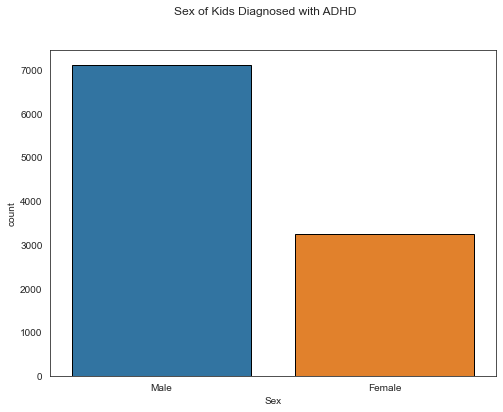

In [32]:
# Grab a dataframe with only ADHD diagnosed kids
adhd_df = nsch[nsch['K2Q31A'] == 1]

# Replace numbers with "Male" and "Female" for easier plotting
adhd_df['SC_SEX'] = adhd_df['SC_SEX'].replace({1: 'Male', 2: 'Female'})

# Plotting
sex_fig, sex_ax = plt.subplots(figsize=(8, 6))
adhd_sex_figure = sns.countplot(adhd_df['SC_SEX'], ax=sex_ax, edgecolor='black', order=['Male', 'Female'])
plt.suptitle('Sex of Kids Diagnosed with ADHD')
adhd_sex_figure.set(xlabel='Sex');



In [33]:
# Get normalized value counts of Sex
male_p, female_p = adhd_df['SC_SEX'].value_counts(normalize=True)

# Print percentages rounded to the nearest whole number.
print(f' Of all the kids with ADHD in our sample {male_p*100:.0f}% are male, and {female_p*100:.0f}% are female')

 Of all the kids with ADHD in our sample 69% are male, and 31% are female


### Analysis
These results match up with the Census Bueraus findings that males are more likley to be diagnosed with ADHD then females are. ADHD and sex is a subject of ongoing research, and I highly suggest reading [this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6923191/) study on the subject matter for an in-depth look on the matter.

# ADHD and Age
Now to investigate the ages of those with ADHD.

In [34]:
# Replacing formtype category names for more readable graphs
adhd_df['FORMTYPE'] = adhd_df['FORMTYPE'].astype('str').replace({"b'T1'": 'Group 1 (0-5)', "b'T2'": 'Group 2 (6-11)', "b'T3'": 'Group 3 (12-17)'})
nsch['FORMTYPE'] = nsch['FORMTYPE'].astype('str').replace({"b'T1'": 'Group 1 (0-5)', "b'T2'": 'Group 2 (6-11)', "b'T3'": 'Group 3 (12-17)'})

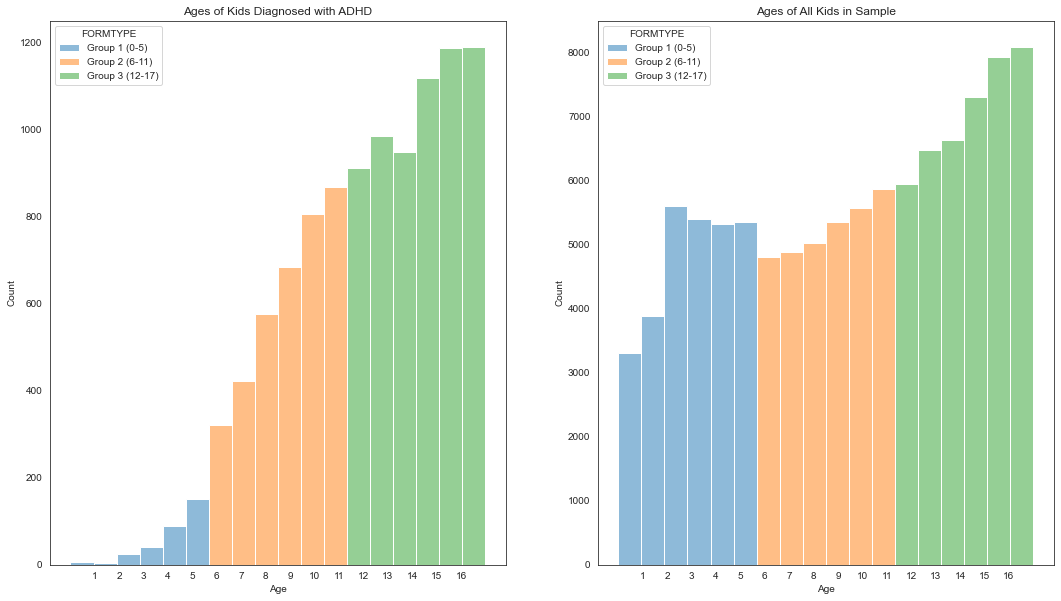

In [35]:
# Set figure and axis
agefig, (ageax, realax) = plt.subplots(1, 2, figsize=(18, 10))

# Plot figure with 18 bins (ages go from 1-17) with an extra bin for aesthetic reasons
age_figure = sns.histplot(data=adhd_df, x='SC_AGE_YEARS', ax=ageax, bins=18, hue='FORMTYPE', hue_order=['Group 1 (0-5)', 'Group 2 (6-11)', 'Group 3 (12-17)'])
real_figure = sns.histplot(data=nsch, x='SC_AGE_YEARS', ax=realax, bins=18, hue='FORMTYPE', hue_order=['Group 1 (0-5)', 'Group 2 (6-11)', 'Group 3 (12-17)'])

# Setting labels, title, and ticks.
age_figure.set(title='Ages of Kids Diagnosed with ADHD', xlabel='Age', xticks=list(range(1, 17)))
real_figure.set(title='Ages of All Kids in Sample', xlabel='Age', xticks=list(range(1, 17)));



## Analysis
The above graphs make sense to me in context of our data, ADHD is more easily noticeable as children are asked to perform more complex tasks in school. Though it will be important to remember that the resulting model will have a harder time with children in group 1 since there are far less of them.

# ADHD Diagnoses and Race

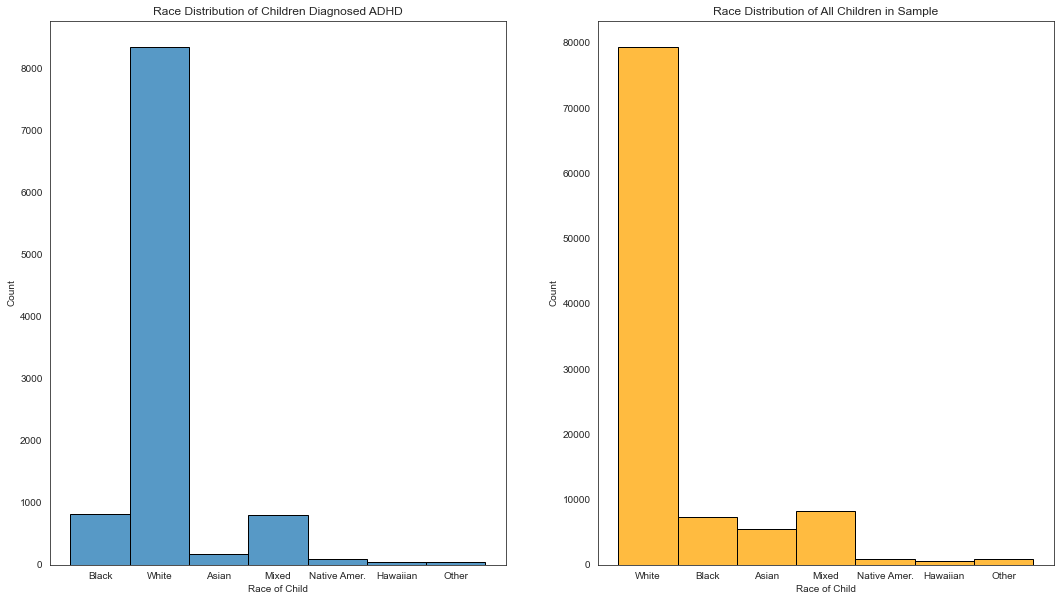

In [36]:
# Replacing formtype category names for more readable graphs
adhd_df['SC_RACE_R'] = adhd_df['SC_RACE_R'].replace({ 1: 'White', 2: 'Black', 3: 'Native Amer.', 4: 'Asian', 5:'Hawaiian', 6:'Other',  7: 'Mixed'})
nsch['SC_RACE_R'] = nsch['SC_RACE_R'].replace({ 1: 'White', 2: 'Black', 3: 'Native Amer.', 4: 'Asian', 5:'Hawaiian', 6:'Other', 7: 'Mixed'})

# Creating figure and axes
racefig, (adhd_race_ax, sample_race_ax) = plt.subplots(1, 2, figsize=(18, 10))

# Plotting racial distribution of kids diagnosed with ADHD
adhd_race_figure = sns.histplot(adhd_df, x='SC_RACE_R', ax=adhd_race_ax, edgecolor='black')

# Setting xlabel and title
adhd_race_figure.set(xlabel='Race of Child', title='Race Distribution of Children Diagnosed ADHD')

# Plotting racial distribution of sample
sample_race_figure = sns.histplot(nsch, x='SC_RACE_R', ax=sample_race_ax, color='orange', edgecolor='black')

# Setting xlabel and title
sample_race_figure.set(xlabel='Race of Child', title='Race Distribution of All Children in Sample');

In [37]:
adhd_df['SC_RACE_R'].value_counts(normalize=True)

White           0.807525
Black           0.079021
Mixed           0.077861
Asian           0.017313
Native Amer.    0.009382
Other           0.005029
Hawaiian        0.003869
Name: SC_RACE_R, dtype: float64

### Analysis
The distributions seem to match except for one small quirk, there are only about half the amount of asian kids we would expect. I will refrain from simply guessing why this could be, but it will be important to note this aspect of the data. It is also important to note that the distribution of our overall data does not match the [overall estimates](https://www.census.gov/quickfacts/fact/table/US/PST045219) for the United States. This will be another limitation of my data.

## Why These Things Matter
This data is important, because my model is only as good as my data. My model will be good at diagnosing white males between the ages of 12-17. This is because that is what I have the most data for. It is very possible model may struggle to correctly classify female, or non-white kids when it comes to ADHD. It's important to be transparent about these things, and also to remember that using the data as it is will mean **reinforcing any bias that is already present in the data**. These things may not be guarenteed, and I will definitely be checking them while modeling.

# ADHD Diagnoses and Special Health Care Needs

In [38]:
# 1 = special health care needs
# 2  = Not special health care needs

cshcn_adhd, n_cshcn_adhd = adhd_df['SC_CSHCN'].value_counts(normalize=True)
n_cshcn, cshcn = nsch['SC_CSHCN'].value_counts(normalize=True)
print(f'{cshcn*100:.0f}% of kids in the sample are considered to have special health care needs')
print(f'{cshcn_adhd*100:.0f}% of kids with ADHD are considered to have special health care needs')

23% of kids in the sample are considered to have special health care needs
79% of kids with ADHD are considered to have special health care needs


In the methodology report, the Census Bureau mentions that they oversampled CSHCN kids by 80%, and it looks like most kids with ADHD are generally considered CSHCN. It may be important to take this out when training the model, but it will be interesting to see how this affects model performance.

## ADHD Correlations
I will now take a moment to explore ADHD's correlations to other columns in the data.

In [39]:
nsch_corr = nsch.corr()

In [40]:
nsch_corr['K2Q31A'].sort_values(ascending=False)

K2Q31A        1.000000
K4Q23         0.624507
MEMORYCOND    0.509671
K2Q34A        0.500545
SC_CSHCN      0.440946
                ...   
TOTCSHCN     -0.362092
K2Q31B             NaN
K2Q31D             NaN
ADDTREAT           NaN
K2Q31C             NaN
Name: K2Q31A, Length: 423, dtype: float64

## Analysis

**K4Q23**
   - Is if the child is being medicated for ADHD or another condition, this can be removed for the modeling process, as someone undiagnosed won't be taking medication for ADHD.

**K2Q34A**
 - This is asking if a doctor or teacher has ever said that the child has "behavioral issues". In context, this makes sense, as hyperactivity and inattention are often described as "behavioral issues".

**MEMORYCOND**
 - This question asks if the child has difficulty concentrating, remembering, or making decisions. This is a classic ADHD symptom, and makes a lot of sense.

**SC_CSHCN**
 - Special health care needs, I have already discussed this category above.

**SC_K2Q22**
 - This questions asks if the child needs treatment for a chronic behavioral/emotional problem. It can be saftley removed when modeling.

**SC_K2Q30A**
 - Asks if the child is diagnosed with a learning disability, which ADHD is considered. I think this question doesn't correlate more highly because people aren't sure how ADHD is classified, but that is speculation.

**SC_K2Q10**
 - If the child needs ANY medication

**K4Q22_R**
 - If the child needs mental health treatment

**SC_K2Q13**
 - If the child needs more medical care then usual

**K6Q15**
 - If the child needs a special education plan

**AUTISMMED**
 - Interestingly, if the child is taking autism medication is more highly correlated then if a child has been diagnosed

**K2Q33A**
 - If the child has been diagnosed with anxiety issues, this matches with finding from the Census Bureau that kids with ADHD are more likely to have anxiety issues.

**SC_K2Q20**
 - If the child requires special therapy for any condition

**K4Q36**
 - Another question asking if the child needs speech therapy for a behavioral condition

**TOTNONSHCN**
 - Total children in househould that are considered CSHCN

**K4Q28X04**
 - If the child needed mental health services, but did not receive them

**DISTRACTED**
 - A rating of 1-5 on how easily the child is distracted


There are quite a few more, however, this  has given me a pretty good idea on what will need to be omitted from the model, and what will be good to include. All of the highly correlated variables either are directly linked to treatement of ADHD, and will be ommited, or they are common symptoms/signs of ADHD.

## ADHD and Other Mental Health conditions
I want to explore how often other mental health conditions appear with ADHD, lets take a look.

In [41]:
adhd_df['K2Q33A'] = adhd_df['K2Q33A'].replace({1: 'Anxiety', 2: 'No Anxiety'})
adhd_df['K2Q32A'] = adhd_df['K2Q32A'].replace({1: 'Depression', 2: 'No Depression'})

In [42]:
adhd_df['K2Q33A'].value_counts()

No Anxiety    5936
Anxiety       4368
Name: K2Q33A, dtype: int64

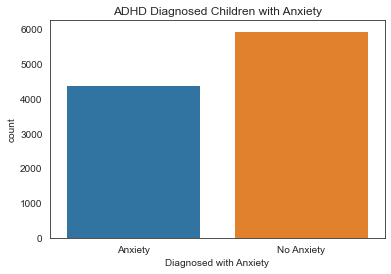

In [43]:
anxiety_figure = sns.countplot(x='K2Q33A', data=adhd_df, order=['Anxiety', 'No Anxiety'])
anxiety_figure.set(title='ADHD Diagnosed Children with Anxiety', xlabel="Diagnosed with Anxiety");

# Conclusion

The limitations of this data are:

There are **9325 children** in this sample have been **diagnosed** with ADHD.
<br>

**9%** of kids in this sample have been **diagnosed** ADHD.
<br>

Of these kids, **69% are male**, and **31% are female**
<br>

of the kids diagnosed with ADHD,
   - **61%** are between the ages of **12-17**
   - **36%** are between the ages of **6-11**
   - **3%** are between the ages of **0-5**

The Racial/Ethnic distribution of children with ADHD is:

| Race        | Percentage  |
| ----------- | ----------- |
| White       | 81%         |
| Black       | 8%          |
| Asian       | 2%          |
| Mixed       | 8%          |
| Native Am.  | 0.009%      |
| Hawaiian    | 0.003%      |
| Other       | 0.004%      |


The next step in to begin the [Data Cleaning](Data_Cleaning.ipynb) process.